# **TTI109 - Estatística**
# **Laboratório 09 - Intervalos de Confiança**

Nessa aula vamos aprender a construir:

* Estimar o valor de um parâmetro populacional;
* Fazer uma estimativa intervalar;
* Encontrar a margem de erro;
* Construir um intervalo de confiança.

### **Estimativa pontual**

**Exercício:**

Um pesquisador da área econômica está coletando dados sobre funcionários de mercearias em um condado. Os dados listados a seguir representam uma amostra aleatória do número de horas semanais trabalhadas por 40 funcionários de diversas mercearias no condado.

*(Adaptado de: U.S. Bureau o Labor Statistics)*

```Python
[ 30, 26, 33, 26, 26, 33, 31, 31, 21, 37, 
  27, 20, 34, 35, 30, 24, 38, 34, 39, 31, 
  22, 30, 23, 23, 31, 44, 31, 33, 33, 26, 
  27, 28, 25, 35, 23, 32, 29, 31, 25, 27 ]
```

Encontre urna estimativa pontual da média populacional $\mu$.

In [1]:
# Importa a biblioteca
import pandas as pd

# Dados amostrais
horas = pd.Series([ 30, 26, 33, 26, 26, 33, 31, 31, 21, 37, 
  27, 20, 34, 35, 30, 24, 38, 34, 39, 31, 
  22, 30, 23, 23, 31, 44, 31, 33, 33, 26, 
  27, 28, 25, 35, 23, 32, 29, 31, 25, 27 ])

# Estimativa da média populacional
media = horas.mean()

# Imprime
print(f"Média: {media:.2f}")

Média: 29.60


### **Intervalo de confiança para a média, com $\sigma$ conhecido**

Use os dados do da célula anterior para construir um intervalo de confiança de 95% para o número médio de horas semanais trabalhadas por funcionários de mercearias.

Suponha que o desvio padrão da população seja de 7,9 horas.

In [10]:
# Importa a biblioteca
from scipy import stats as st

# Desvio padrão populacional conhecido
dp = 7.9

# Nível de confiança
nivel = .95

# Desvio padrão da distribuiução normal das médias amostrais
dp_ = dp / (len(horas) ** 0.5)

# Intervalo de confiança de 95% para a média populacional
intervalo = st.norm.interval( loc=media, scale=dp_, confidence=nivel)

# Imprime
print(f"Intervalo de confiança: {intervalo[0]:.1f} a {intervalo[1]:.1f}")


Intervalo de confiança: 27.2 a 32.0


### **Margem de Erro**

Use os dados do exemplo anterior para encontrar a margem de erro:
$$E =z_c \frac{\sigma}{\sqrt{n}}$$

Onde:
* $z_c$ é o valor crítico da distribuição normal para o nível de confiança desejado.
* $\sigma$ é o desvio padrão populacional.
* *n* é o tamanho da amostra.

Você pode encontrar o valor crítico $z_c$ para o nível de confiança de 95% usando a função `ppf()` da distribuição normal padrão em `scipy.stats`. 

O valor de $z_c$ para um nível de confiança de 95% é aproximadamente 1,96.

In [12]:
# Valor crítico (zc) para o nível de confiança de 95%
zc = 1.96

# Cálculo da margem de erro
margem_erro = zc * dp/len(horas)**0.5

# imprime
print(f"Margem de erro: {margem_erro:.1f}")

Margem de erro: 2.4


### **Intervalo de Confiança**

Use os dados anteriores para construir um intervalo de confiança de 95% para o número médio de horas semanais trabalhadas por funcionários de mercearias.

Para construir um intervalo de confiança de 95% para o número médio de horas semanais trabalhadas por funcionários de mercearias, vamos usar os dados anteriores. A fórmula para calcular o intervalo de confiança é:

$$ \overline{x} - E < \mu < \overline{x} + E $$

Onde:
* $\overline{x}$ é a média amostral (número médio de horas semanais trabalhadas por funcionários)
* *E* é a margem de erro, que já vimos

Com os dados anteriores, temos:
* $\sigma$: 7.9 (desvio padrão populacional)
* Nível de confiança de 95% ($z_c$ = 1,96 aproximadamente)
* n: número de amostras
* $\overline{x}$ média amostral

In [13]:
# Intervalo de confiança
intervalo = (media - margem_erro, media + margem_erro)


# Imprime
print(f"Intervalo de confiança: {intervalo[0]:.1f} a {intervalo[1]:.1f}")

Intervalo de confiança: 27.2 a 32.0


### **Intervalo de confiança para a média, com $\sigma$ desconhecido**

Você seleciona aleatoriamente 16 cafeterias e mede a temperatura do café vendido em cada uma delas. A temperatura média da amostra é 162,0 ºF com desvio padrão de 10,0 ºF. 

Construa um intervalo de confiança de 95% para a temperatura média da população de cafés vendidos.

Suponha que as temperaturas tenham distribuição aproximadamente normal.

In [14]:
# Atributos da distribuição
c = 0.95
media=162
s=10
n=16
g1=n-1


# Intervalo de confiança para a média populacional
intervalo = st.t.interval( confidence=c, df=g1, loc=media, scale=s/(n**0.5))

# Imprime
print(f"Intervalo de confiança: {intervalo[0]:.1f} a {intervalo[1]:.1f}")


Intervalo de confiança: 156.7 a 167.3


## **A Distribuição Chi-Quadrado**

Se a variável aleatória $x$ tem uma distribuição normal com desvio padrão $\sigma$, então

$$\chi^2=\frac{(n-1)s^2}{\sigma^2}$$

resulta em uma distribuição qui-quadrado com $n – 1$ graus de liberdade, para amostras de qualquer tamanho $n > 1$.

No Python, usaremos o método *pdf* *(probability density function)* da classe *stats.chi2* (biblioteca *scipy*).

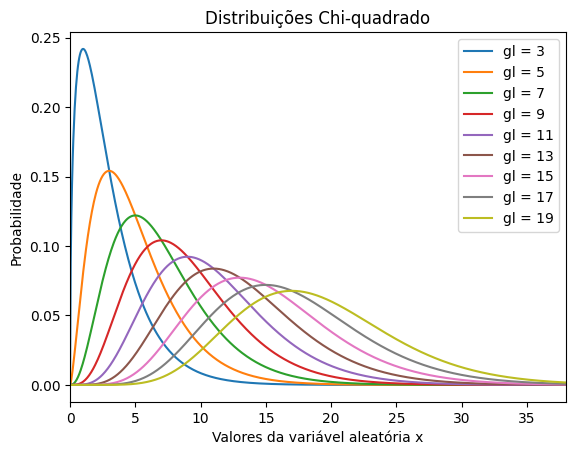

In [16]:
# Importa a biblioteca
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Geração da lista de graus de liberdade para a visualização (de 3 a 19)
gl = list(range(3, 21, 2))

# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 750, 0, max(gl)*2

# Plotagem dos gráficos
for grau in gl:
  # Determinação da distribuição chi-quadrado, com o correspondente gl
  chiquad = st.chi2(df=grau)
  x = np.linspace(INICIO, FIM, QUANT)
  # Determinação da função densidade de probabilidade
  y = chiquad.pdf(x)
  plt.plot(x, y, label='gl = '+ str(grau))

# Atributos do gráfico
plt.legend()
plt.xlim(0, max(gl)*2)
plt.title('Distribuições Chi-quadrado')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.show()

### **Exercício:**

Encontre os valores críticos $\chi^2_R$ e $\chi^2_L$ para um intervalo de confiança de 95% quando o tamanho da amostra é 18.

In [19]:
# Criação da distribuição chi-quadrado com 17 grau de liberdade
n=18
g1 = n-1
chiquad = st.chi2(df=g1)

# Nível de confiança
confi = 0.95

# Determinação dos valores críticos
x2l = chiquad.ppf((1-confi)/2)
x2r = chiquad.ppf((1+confi)/2)

# Imprime
print(f"Valores críticos: {x2l:.3f} e {x2r:.3f}")

Valores críticos: 7.564 e 30.191


### **Intervalos de Confiança para $\sigma^2$ e $\sigma$**

O intervalo de confiança *c* para a variância e o desvio padrão populacional é:

* Intervalo de confiança para $\sigma^2$:
$$\frac{(n-1)s^2}{\chi^2_R} < \sigma^2 < \frac{(n-1)s^2}{\chi^2_L}$$

* Intervalo de confiança para $\sigma$:
$$\sqrt{\frac{(n-1)s^2}{\chi^2_R}} < \sigma < \sqrt{\frac{(n-1)s^2}{\chi^2_L}}$$

A probabilidade de que os intervalos de confiança contenham $\sigma^2$ ou $\sigma$ é *c*, supondo que o processo de estimação é repetido um grande número de vezes.

**Exercício:**

Você seleciona aleatoriamente e pesa as 30 unidades de uma amostra de um antialérgico. O desvio padrão da amostra é de 1,20 miligrama. Supondo que os pesos são normalmente distribuídos, construa intervalos de confiança de 99% para a variância e o desvio padrão da população de pesos dos remédios.

In [22]:
# Criação da distribuição chi-quadrado com 29 grau de liberdade
n = 30
dp = 1.20
g1 = n-1
chiquad = st.chi2(df=g1)

# Nível de confiança
confi = 0.99

# Desvio padrão amostral
dpa = dp/(n**0.5)

# Determinação dos valores críticos
vcritic = chiquad.interval(confi)

# Extremos do IC para variância
x2l = (n-1)*dp**2/vcritic[1]
x2r = (n-1)*dp**2/vcritic[0]

# Imprime
print(f'valor crítico: {vcritic[0]:.3f} e {vcritic[1]:.3f}')
# print(f"Intervalo de confiança: {x2l:.3f} e {x2r:.3f}") <-- está errado 
print(f"Intervalo de confiança: {x2r:.3f} e {x2l:.3f}")



valor crítico: 13.121 e 52.336
Intervalo de confiança: 3.183 e 0.798
